In [1]:
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

(400, 400, 3)


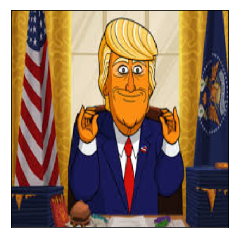

In [22]:
im=io.imread('/home/manish/Desktop/images1.jpeg')
im=cv2.resize(im,(400,400))
plt.xticks([])
plt.yticks([])
plt.imshow(im)
print im.shape
plt.show()

In [23]:
data=im.reshape(-1,3)
data.shape

(160000, 3)

In [24]:
km=KMeans(n_clusters=5)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
dominant_colors=km.cluster_centers_.astype(np.uint8)

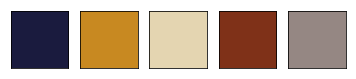

In [26]:
plt.figure(0)

for i in range(dominant_colors.shape[0]):
    plt.subplot(1,dominant_colors.shape[0],i+1)
    plt.xticks([])
    plt.yticks([])
    col=np.zeros((100,100,3),dtype=np.uint8)
    col[:,:,:]=dominant_colors[i]
    plt.imshow(col)

In [27]:
new_image=np.zeros_like(data)
labels=km.predict(data)
print np.unique(labels,return_counts=False)

[0 1 2 3 4]


In [28]:
for ix in range(len(new_image)):
    new_image[ix,:]=dominant_colors[labels[ix]]
    

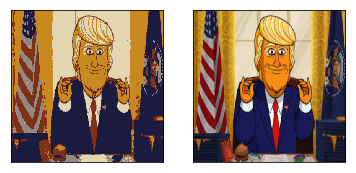

In [31]:
#new image
plt.subplot(1, 2, 1)
plt.grid("off")
plt.xticks([])
plt.yticks([])
plt.imshow(new_image.reshape(im.shape))

#actual image
plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.imshow(im)